
# <center> **05. Deep Neural Networks (DNN)** </center>



## <span style="color:red"> Outline </span>
1. [**Activations, optimizers and other tricks**](#Act)
2. [**DNN in regression: applications**](#DNN_reg)
3. [**DNN in classification: applications**](#DNN_class)



In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/2024-2/IA2/Inteligencia Artificial -  II/ai-2-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/2024-2/IA2/Inteligencia Artificial -  II/ai-2-uis-student


In [ ]:

#@title **Load libraries**
#@markdown Here is **important to change** to GPU


import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

#**1. Activations, optimizers and other tricks**  <a name="Act"></a>

- ### **Activation functions**

Introduce the non-linearity into the output of a neuron. This is **important** since most real world data is non-linear. Then, we want neurons to learn non-linear representations.


<center><img src="https://github.com/wDavid98/IA-docs/blob/main/data/actifunc.png?raw=true" width="400">



Function                                          | $f(x)$|  $\frac{\partial f(x)}{\partial x}$
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       |
$$Sigmoid = $$  |  $$ \large \frac{1}{1 + e^{-x}}$$   | $$\large f(x)(1-f(x))$$|
$$Tanh = $$     | $$\large \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$|$$\large (1-(f(x)^{2})$$|
$$ReLU = $$     | $$\large \max(0.01x, x)$$|$$\large \left\{\begin{matrix}
0.01 & \text{if} & x<0 \\
1    & \text{if} &  x>0
\end{matrix}\right.$$|

</center>

[Keras activations](https://keras.io/api/layers/activations/)


- ### **Optimizers**

  -   **Stochastic gradient descent (SGD):** uses a single data sample randomly selected to calculate gradient descent and update weights at every iteration.
  -  **Mini-batch gradient:** uses a mini-batch of samples, randomly selected at each iteration. Converge faster and it more stable than SGD

  - **Momentum** compute speed of gradient and  helps accelerate SGD in the relevant direction:

  $$
\begin{matrix}
\upsilon_t := \gamma\upsilon_{t-1} +\eta \frac{\partial \mathbf{J(W)}}{\partial W}
\\
\\
W_{i,j}^{l} := W_{i,j}^{l} - \upsilon_t
\end{matrix}$$

  - **AdaGrad Optimizer:** Change learning rate parameter according to sparsity of data. Then smaller updates are performed for frequently features.  $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{\partial J + \epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$
     
  - **Adadelta Optimizer:** $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{(1-\gamma )\partial J_{t-1} +  \gamma\partial J_t +\epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$
  
  - **RMSprop:**  divides the learning rate by an exponentially decaying average of squared gradients [RMSprop-Hinton](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)

 - **Adam:** **Ada**ptive **M**oment Estimation computes adaptive learning rates for each parameter

  $$
\begin{matrix}
m_t := \beta_1m_{t-1} +(1-\beta_1) \frac{\partial \mathbf{J(W)}}{\partial W}
\\
\\
\upsilon_t := \beta_2\upsilon_{t-1} +(1-\beta_2) \frac{\partial \mathbf{J(W)^{2}}}{\partial W}
\\
\\
W_{i,j}^{l} := W_{i,j}^{l} - \frac{\eta }{\sqrt{\upsilon_t+\epsilon}}\hat{m}_t
\end{matrix}$$

Where $m_t, \upsilon_t$ approximates the mean and variance, respectively. In same sense, there exist many other approximations like **AMSGrad, Nadam, Adadelta, ...**


<center><img src="https://github.com/wDavid98/IA-docs/blob/main/data/optmized_simul.gif?raw=true" width="400"></center>


[Simulation](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/)

# **2. DNN in regression: applications**  <a name="DNN_reg"></a>

Now, we goint to use all these concepts to deal with real machine learning problems. Firstly, we will load the well know `boston_housing`



In [ ]:
import tensorflow as tf

dataset = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
[x_train, y_train], [x_test, y_test] = dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [ ]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

#**CHALLENGE**

Bult a DNN of four layers, with activation relu.
  - Define three dense hidden layers of 64 neurons
  - In output layer **Remember** that is a regression problem.
  - Use optimized `RMSprop(0.001)`
  - compile loss as `mse`



In [ ]:
#@title **Student code**
def build_RMSprop_model(x_train):
  # Importing allowed libraries
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras

  """
  Put your code here
  """

  return

model = build_RMSprop_model(x_train);
model.summary()

In [ ]:
#@title **Coding:** now it is time to train the model
iterations = 100
history = model.fit(x_train, y_train, epochs=iterations,  validation_split = 0.2, batch_size=32)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.5252 - mae: 2.8428 - mse: 14.5252 - val_loss: 34.8102 - val_mae: 4.1172 - val_mse: 34.8102
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2211 - mae: 2.7037 - mse: 14.2211 - val_loss: 48.9114 - val_mae: 4.9389 - val_mse: 48.9114
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.3099 - mae: 3.1640 - mse: 22.3099 - val_loss: 18.7613 - val_mae: 3.3376 - val_mse: 18.7613
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.7874 - mae: 2.6775 - mse: 15.7874 - val_loss: 29.0655 - val_mae: 4.1375 - val_mse: 29.0655
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.5837 - mae: 3.3156 - mse: 21.5837 - val_loss: 15.2110 - val_mae: 2.8480 - val_mse: 15.2110
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.8735 - mae: 2.9474 - mse: 16.8735 - val_loss: 18.3313 - val_mae: 3.1504 - val_mse: 18.3313
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.2785 - mae: 2.6514 

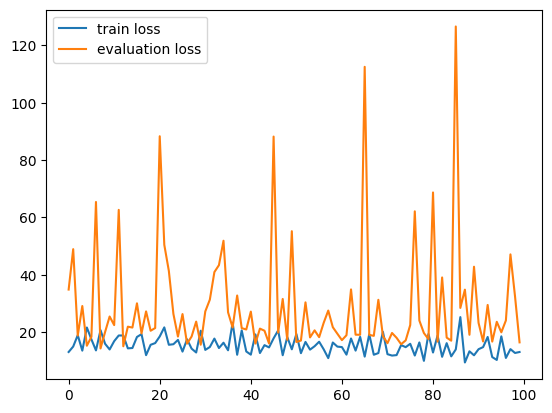

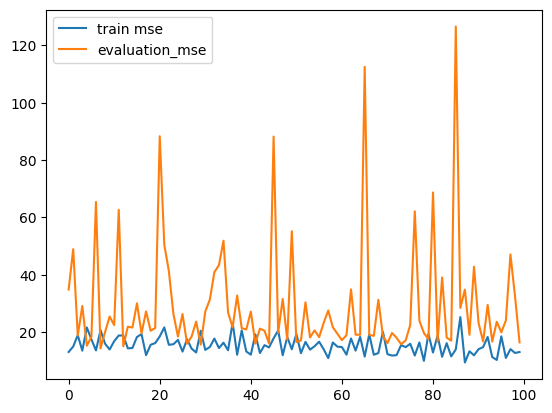

In [ ]:
#@title **Coding:** ploting the performance of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['mse'], label='train mse');
plt.plot(history.history['val_mse'], label='evaluation_mse');
plt.legend()
plt.show()

In [ ]:
#@title **Coding:** Now, we have to evaluate the model
loss, mae, mse = model.evaluate(x_test, y_test)
loss, mae, mse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.7412 - mae: 3.3362 - mse: 23.7412 


(27.488948822021484, 3.578651189804077, 27.488948822021484)

#**CHALLENGE**

Now, change the layers, optimizer, activations and get a better result!


# **3. DNN in classification: applications** <a name="DNN_class"></a>

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/DNN_5.png?raw=true" width="400" >

In this case, we use a **one hot encoding** to give an answer. So, each neuron respond to a specific class and in last layer sigmoids are implemented.

Now, we going to test the power of DNN in non-linear data. We going to load the next data:


X:  (10000, 2)  Y:  (10000,)
(7000, 2) (3000, 2) (7000,) (3000,)
categorical y_train:  (7000, 2)
categorical y_test:  (3000, 2)


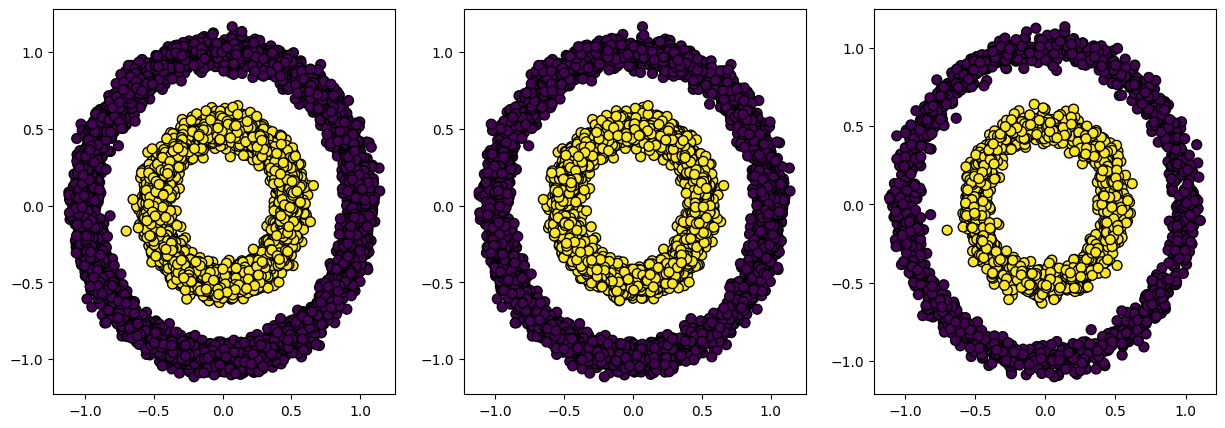

In [ ]:
#@title **Coding** we can deal with non-linear boundaries!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=10000, factor=0.5, random_state=0, noise=0.05)
print("X: ", X.shape, " Y: ", Y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, edgecolor='k')

y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
print("categorical y_train: ", y_train.shape)
print("categorical y_test: ", y_test.shape)

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

#**CHALLENGE**

- Implement DNN of above figure for the above toy dataset.
- Use relu for hidden layer

In [ ]:
#@title **Solution:** Build a DNN architecture
model = ...

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 #@title **Solution** Now, compile the model
model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['binary_accuracy'])

- Use an Adam optimizer
- Use a loss `'binary_crossentropy'`
- metrics should be `['binary_accuracy']`



In [ ]:
#@title **Student code** Now, compile the model
model.compile(...)

In [ ]:
#@title **Coding** train the model
history = model.fit(
    x_train, y_train,
    epochs=150,
    validation_split = 0.2,
    verbose=True)

Epoch 1/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.9990 - loss: 0.0127 - val_binary_accuracy: 1.0000 - val_loss: 0.0093
Epoch 2/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9986 - loss: 0.0122 - val_binary_accuracy: 1.0000 - val_loss: 0.0091
Epoch 3/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9989 - loss: 0.0111 - val_binary_accuracy: 1.0000 - val_loss: 0.0091
Epoch 4/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9980 - loss: 0.0126 - val_binary_accuracy: 1.0000 - val_loss: 0.0090
Epoch 5/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9987 - loss: 0.0121 - val_binary_accuracy: 1.0000 - val_loss: 0.0089
Epoch 6/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9995 - loss: 0.0113 - val_binary_accuracy: 1.0000 - val_loss: 0.0088
Epoch 7/150
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9993 - loss: 0.0113 - val_binary_accuracy: 1.0000 - val_loss: 0.0089

In [ ]:
#@title **Coding** evaluating the model
loss, acc = model.evaluate(x_test, y_test)
loss, acc

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9999 - loss: 0.0060


(0.006519225426018238, 0.999666690826416)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[1 0 0 ... 1 0 1]
(3000, 2)
(3000,)


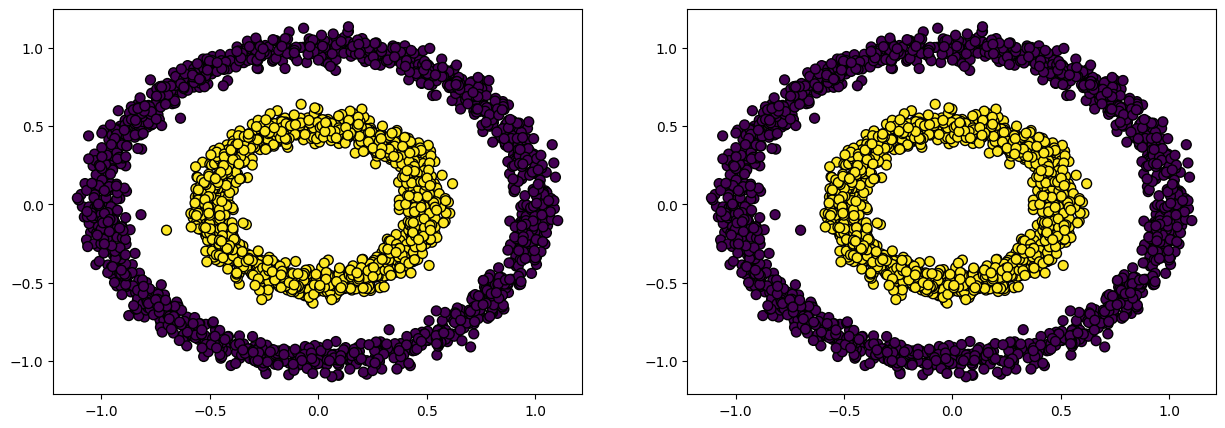

In [ ]:
#@title **Coding** Draw the prediction of the model, it should be almost perfect!
y_estimated = model.predict(x_test)
y_estimated = y_estimated.argmax(axis=-1)
print(y_estimated)
print(y_test.shape)
print(np.argmax(y_test ,axis=-1).shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(y_test ,axis=1), s=50, edgecolor='k')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_estimated, s=50, edgecolor='k')

Now , we are going to work in a more real dataset. We we load the Breast cancer dataset








,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


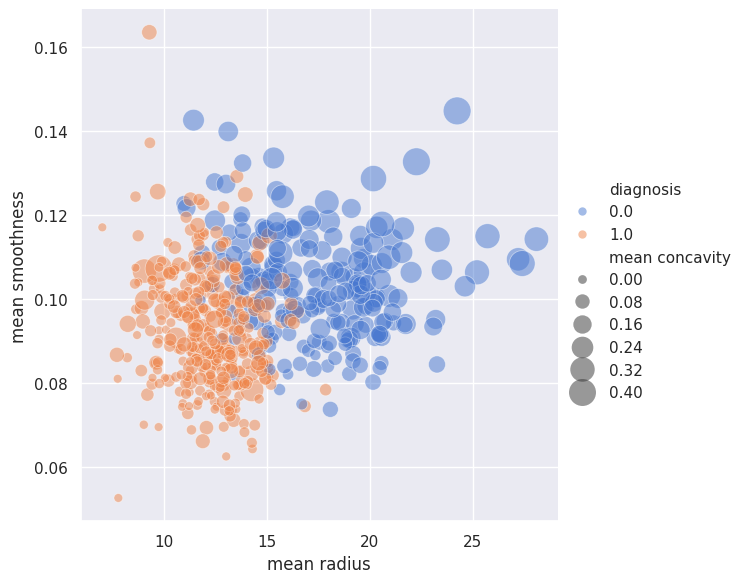

In [ ]:
#@title **Coding: Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}

import io
import requests
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()

cancer = load_breast_cancer()

cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **Coding** time to select the features
# Indicate the classification variable
Y = cancer.target
Y = tf.keras.utils.to_categorical(Y, num_classes=2)
# Concatenate to form the training data
X = cancer.data

In [ ]:
#@title **Coding** spliting data
from sklearn.model_selection import train_test_split
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(569, 30) (569, 2)


((398, 30), (171, 30), (398, 2), (171, 2))

#**CHALLENGE**

- Implement DNN for leaf_class_1.csv
- Use almost three hidden layers
- **Remember** that is a classification problem to implement last layer
- Use any optimizer as you prefer
- Compile with `binary_accuracy`



In [ ]:
#@title **Student code for the solution** Build the DNN
def build_binary_accuracy_model():
  # Importing allowed libraries
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras

  """
  Put your code here
  """

  return

In [ ]:
#@title **Coding** fitting the model
iterations = 10

history = model.fit(
  x_train, y_train,
  epochs=iterations,
  validation_split = 0.2, verbose=True)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - binary_accuracy: 0.8532 - loss: 0.7303 - val_binary_accuracy: 0.8813 - val_loss: 0.5655
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8520 - loss: 0.6663 - val_binary_accuracy: 0.8000 - val_loss: 1.1080
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.8126 - loss: 1.0378 - val_binary_accuracy: 0.9125 - val_loss: 0.3203
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.8287 - loss: 0.7435 - val_binary_accuracy: 0.8687 - val_loss: 0.5301
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8567 - loss: 0.7069 - val_binary_accuracy: 0.7000 - val_loss: 1.2395
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.7707 - loss: 1.3389 - val_binary_accuracy: 0.6125 - val_loss: 1.7019
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7537 - loss: 1.3661 - val_binary_accuracy: 0.7250 - val_loss: 1.4082
Epoch 8/10
10/

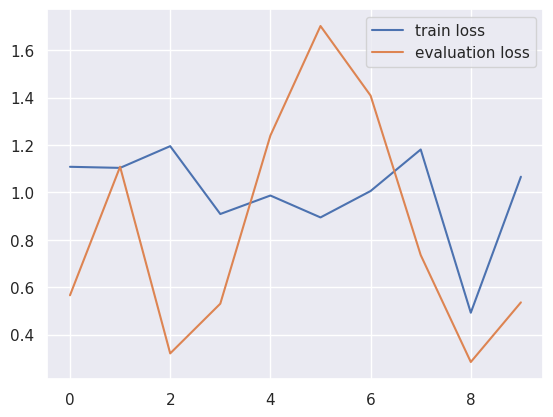

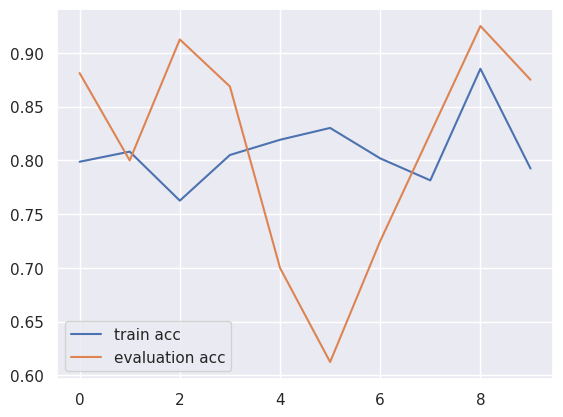

In [ ]:
#@title **Coding** plots
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['binary_accuracy'], label='train acc');
plt.plot(history.history['val_binary_accuracy'], label='evaluation acc');
plt.legend()
plt.show()

In [ ]:
#@title **Coding** evaluate the model in testing set
loss, acc = model.evaluate(x_test, y_test)
loss, acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - binary_accuracy: 0.9130 - loss: 0.4979


(0.5314806699752808, 0.9152047038078308)

#**CHALLENGE**

A main challenge on data analysis is related with image classification. There exist a family of `mnist` datasets that could be used to play in this domain.

- Implement a DNN for `mnist` dataset. You can use `fashion-mnist` or `digit-mnist`

- Report the scores.

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/ANNs.gif?raw=true" width="400" >


# References

[1. How the backpropagation algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)

[2. **Momentum** Qian, N. (1999). On the momentum term in gradient descent learning algorithms. Neural Networks : The Official Journal of the International Neural Network Society, 12(1), 145–151.](http://doi.org/10.1016/S0893-6080(98)00116-6)

[3. Keras activations](https://keras.io/api/layers/activations/)

[4. Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12, 2121–2159 ](http://jmlr.org/papers/v12/duchi11a.html)

